In [2]:
# UČITAVANJE REZULTATA
# Prilagodi imena CSV-ova!
import pandas as pd

df1 = pd.read_csv("prompts_single/1_prompt_test_results.csv")
df2 = pd.read_csv("prompts_single/2_chat_test_results.csv")
df3 = pd.read_csv("prompts_single/3_summarize_test_results.csv")
df4 = pd.read_csv("prompts_single/4_batch_test_results.csv")

user_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

dfa = pd.read_csv("locust/1_locust_prompt_test_results.csv")
dfb = pd.read_csv("locust/2_locust_chat_test_results.csv")
dfc = pd.read_csv("locust/3_locust_summarize_test_results.csv")
dfd = pd.read_csv("locust/4_locust_batch_test_results.csv")


locust_df = pd.concat([dfa, dfb, dfc, dfd], ignore_index=True)   # Pretpostavi ime datoteke

user_df['test_type'] = 'client'
locust_df['test_type'] = 'stress'

# join user_df and locust_df
df = pd.concat([user_df, locust_df], ignore_index=True)



df.head(1)
#df.groupby(['model', 'test_type', 'test_name']).size()

,timestamp,test_name,prompt_index,model,prompt,ttft,tpot,tokens_per_sec,latency,prompt_tokens,output_tokens,output_text,status_code,test_type
0,2025-07-25 19:04:05.030325,single,0,gemma3,What are the main steps involved in website op...,55.836664,0.404772,2.470524,55.858593,10.0,138,What are the main steps involved in website op...,200,client


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prikaz osnovne tablice željenih metrika
important_cols = ['model', 'test_name', 'test_type', 'ttft', 'tpot', 'tokens_per_sec', 'latency']

# Create the summary DataFrame globally
summary = df.groupby(['model', 'test_name', 'test_type']).agg({
    'ttft': 'mean',
    'tpot': 'mean',
    'tokens_per_sec': 'mean',
    'latency': 'mean'
}).reset_index()
def summary_statistics(df, model, test_type):
    # Filter by model if provided
    if model is not None:
        df = df[df['model'] == model]
    if test_type is not None:
        df = df[df['test_type'] == test_type]
    # Group and aggregate
    summary = df.groupby(['model', 'test_name', 'test_type']).agg({
        'ttft': 'mean',
        'tpot': 'mean',
        'tokens_per_sec': 'mean',
        'latency': 'mean'
    }).reset_index()
    display(summary)

models = df.model.unique()
test_types = df.test_type.unique()

for model in models:
    for ttype in test_types:
        summary_statistics(df, model, ttype)

stress_summary = summary[summary['test_type'] == 'stress']



,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,gemma3,batch,client,32.924711,0.274354,33.526797,32.931255
1,gemma3,chat,client,12.596248,0.032227,80.520446,12.604553
2,gemma3,single,client,2.613840,0.019406,73.821850,2.622749
3,gemma3,summarizer,client,36.874386,0.003013,331.840331,36.879182


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,mistral,batch,client,3.258612,0.030278,39.413906,3.265610
1,mistral,chat,client,2.444772,0.011133,117.591474,2.453659
2,mistral,single,client,2.494786,0.018473,55.283599,2.503928
3,mistral,summarizer,client,3.380951,0.000239,4178.252221,3.390652


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,mistral,batch,stress,17.943860,0.154018,7.717003,17.953130
1,mistral,chat,stress,129.762687,0.166773,12.351301,129.803901
2,mistral,single,stress,44.300852,0.346041,4.747352,44.314730
3,mistral,summarizer,stress,41.940555,0.002994,501.051288,41.953826


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,meta-llama,batch,client,3.321161,0.023277,43.165226,3.328197
1,meta-llama,chat,client,2.760254,0.011060,124.647677,2.767868
2,meta-llama,single,client,2.750212,0.019302,52.138889,2.758758
3,meta-llama,summarizer,client,3.275768,0.000276,3629.673818,3.281562


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,meta-llama,batch,stress,21.782400,0.152234,7.019988,21.791115
1,meta-llama,chat,stress,172.470728,0.220917,8.410213,172.516374
2,meta-llama,single,stress,54.977543,0.380515,3.994425,54.990304
3,meta-llama,summarizer,stress,60.676035,0.004979,265.634407,60.694689


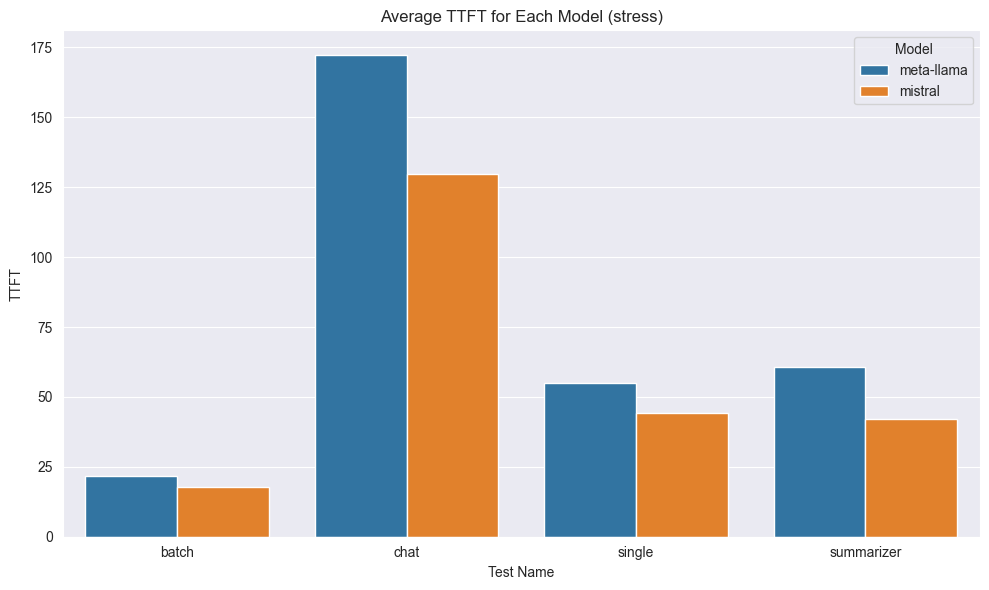

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
single_type = 'stress'
filtered = summary[summary['test_type'] == single_type]



plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='test_name', y='ttft', hue='model')
plt.title(f'Average TTFT for Each Model ({single_type})')
plt.ylabel('TTFT')
plt.xlabel('Test Name')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

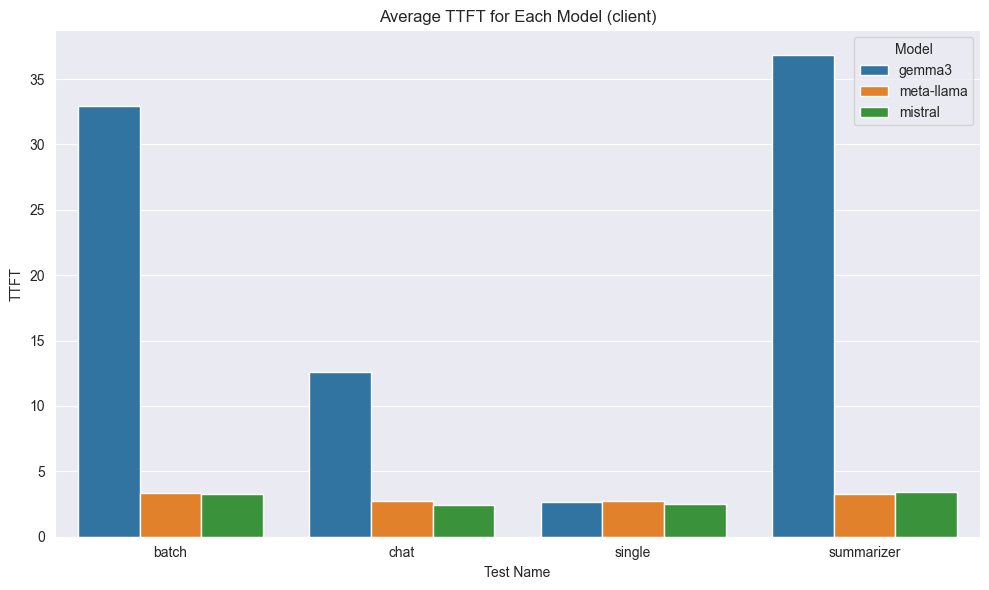

In [17]:
single_type = 'client'
filtered = summary[summary['test_type'] == single_type]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='test_name', y='latency', hue='model')
plt.title(f'Average TTFT for Each Model ({single_type})')
plt.ylabel('TTFT')
plt.xlabel('Test Name')
plt.legend(title='Model')

plt.tight_layout()
plt.show()





In [9]:
grouped = df.groupby(['model', 'test_name', 'test_type'])['ttft'].agg(['mean', 'std']).reset_index()

import plotly.express as px

fig = px.bar(
    grouped[grouped['test_type'] == 'client'],
    x='test_name', y='mean', color='model',
    error_y='std', barmode='group',
    title='TTFT with Error Bars (Interactive)'
)
fig.show()

,model,test_name,ttft_pct_change,tpot_pct_change,tokens_per_sec_pct_change,latency_pct_change
0,meta-llama,batch,-84.75,-84.71,514.89,-84.73
1,meta-llama,chat,-98.40,-94.99,1382.10,-98.40
2,meta-llama,single,-95.00,-94.93,1205.29,-94.98
3,meta-llama,summarizer,-94.60,-94.47,1266.42,-94.59
4,mistral,batch,-81.84,-80.34,410.74,-81.81
5,mistral,chat,-98.12,-93.32,852.06,-98.11
6,mistral,single,-94.37,-94.66,1064.51,-94.35
7,mistral,summarizer,-91.94,-92.01,733.90,-91.92


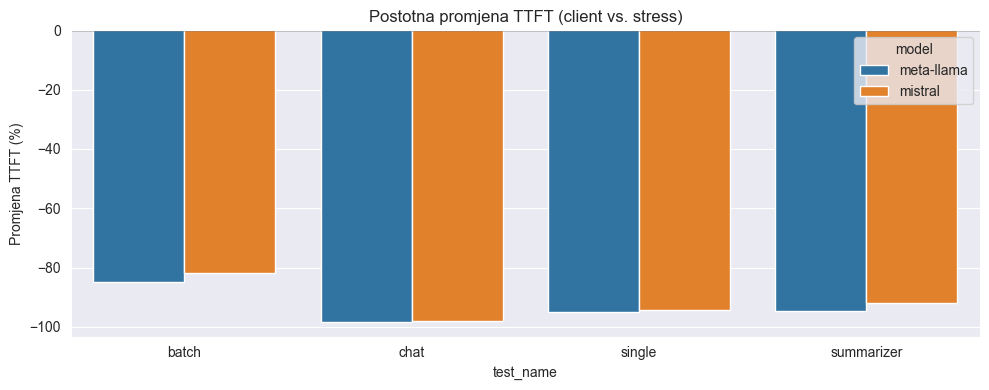

In [80]:
import numpy as np

# Remove 'gemma3' and aggregate
summary = df[~df['model'].str.contains('gemma3')].groupby(['model', 'test_name', 'test_type']).agg({
    'ttft': 'mean',
    'tpot': 'mean',
    'tokens_per_sec': 'mean',
    'latency': 'mean'
}).reset_index()

# Pivot with all expected test_type columns
pivot = summary.pivot(index=['model', 'test_name'], columns='test_type', values=['ttft', 'tpot', 'tokens_per_sec', 'latency'])
# Ensure both 'client' and 'stress' columns exist for each metric
for metric in ['ttft', 'tpot', 'tokens_per_sec', 'latency']:
    for ttype in ['client', 'stress']:
        if ttype not in pivot[metric].columns:
            pivot[metric][ttype] = np.nan
pivot.columns = [f'{metric}_{ttype}' for metric, ttype in pivot.columns]
pivot = pivot.reset_index()


# Pretpostavka: df_pivot je DataFrame kojeg ste prikazali
metrics = ['ttft', 'tpot', 'tokens_per_sec', 'latency']
results = pivot[['model', 'test_name']].copy()

for metric in metrics:
    client = pivot[f'{metric}_client']
    stress = pivot[f'{metric}_stress']
    # Zaštita od dijeljenja s nulom ili vrlo malim vrijednostima
    percent_change = 100 * (client - stress) / stress.replace(0, 1e-6)
    results[f'{metric}_pct_change'] = percent_change.round(2)

# Prikaz rezultata
from IPython.display import display
display(results)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.barplot(data=results, x='test_name', y='ttft_pct_change', hue='model')
plt.ylabel('Promjena TTFT (%)')
plt.title('Postotna promjena TTFT (client vs. stress)')
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


In [ ]:
# TIP TESTA
# Vizualizacija: TTFT po modelima za oba tipa testiranja
plt.figure(figsize=(8,5))
sns.barplot(data=stress_summary, x='model', y='ttft', hue='test_name')
plt.title('Prosječni TTFT po modelima i tipu testa')
plt.ylabel('TTFT [ms]')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tokens_per_sec po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tokens_per_sec', hue='test_name')
plt.title('Prosječan broj tokena u sekundi (tokens_per_sec)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tpot', hue='test_name')
plt.title('Time per output token (tpot)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='latency', hue='test_name')
plt.title('Latencija (tpot)')
plt.ylabel('sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tokens_per_sec po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tokens_per_sec', hue='test_name')
plt.title('Prosječan broj tokena u sekundi (tokens_per_sec)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tpot', hue='test_name')
plt.title('Time per output token (tpot)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='latency', hue='test_name')
plt.title('Latencija (tpot)')
plt.ylabel('sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()